# checking overlap GTs


In [2]:
from gears import PertData
import scanpy as sc
import pandas as pd
from pathlib import Path


In [3]:
data_dir = Path("../data")
pert_data = PertData(data_dir)
pert_data.load(data_name="adamson")
adata = sc.read(data_dir / "adamson/perturb_processed.h5ad")
ori_batch_col = "control"
adata.obs["celltype"] = adata.obs["condition"].astype("category")
adata.obs["str_batch"] = adata.obs["control"].astype(str)
data_is_raw = False

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['SRPR+ctrl' 'SLMO2+ctrl' 'TIMM23+ctrl' 'AMIGO3+ctrl' 'KCTD16+ctrl']
Local copy of pyg dataset is detected. Loading...
Done!


In [15]:
#! curl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE90546&format=file

In [19]:
ls ../GSE90546\ RAW/

GSM2406675_10X001_barcodes.tsv.gz
GSM2406675_10X001_cell_identities.csv.gz
GSM2406675_10X001_genes.tsv.gz
GSM2406675_10X001_matrix.mtx.txt.gz
GSM2406677_10X005_barcodes.tsv.gz
GSM2406677_10X005_cell_identities.csv.gz
GSM2406677_10X005_genes.tsv.gz
GSM2406677_10X005_matrix.mtx.txt.gz
GSM2406681_10X010_barcodes.tsv.gz
GSM2406681_10X010_cell_identities.csv.gz
GSM2406681_10X010_genes.tsv.gz
GSM2406681_10X010_matrix.mtx.txt.gz


In [66]:
mv ../GSE90546\ RAW/GSM2406675_10X001_matrix.mtx.txt.gz ../GSE90546\ RAW/GSM2406675_10X001_matrix.mtx.gz
mv ../GSE90546\ RAW/GSM2406677_10X005_matrix.mtx.txt.gz ../GSE90546\ RAW/GSM2406677_10X005_matrix.mtx.gz

In [37]:
a = pd.read_csv('../GSE90546 RAW/GSM2406677_10X005_cell_identities.csv.gz')
a[a['guide identity'].str.contains('ctrl') & a['good coverage'] & (a['number of cells']==1) & (a['UMI count']>100)]

,cell BC,guide identity,read count,UMI count,coverage,good coverage,number of cells
4,ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537,228,6.741228,True,1
8,GACGTATGACACTG-1,3x_neg_ctrl_pMJ144-1,1324,300,4.413333,True,1
13,GACAGTACTTCTAC-3,3x_neg_ctrl_pMJ144-2,1229,218,5.637615,True,1
15,AAGTCCGATAAGGA-1,3x_neg_ctrl_pMJ144-2,1161,256,4.535156,True,1
21,TGCCGACTCCGTTC-2,3x_neg_ctrl_pMJ144-1,1071,168,6.375000,True,1
...,...,...,...,...,...,...,...
940,TATTTCCTACCTTT-1,3x_neg_ctrl_pMJ144-2,453,106,4.273585,True,1
991,AGCAACACTTCGTT-1,3x_neg_ctrl_pMJ144-2,447,104,4.298077,True,1
1151,GCTCAGCTCCATAG-1,3x_neg_ctrl_pMJ144-1,430,108,3.981481,True,1
1165,GCAATCGAGCCATA-1,3x_neg_ctrl_pMJ144-1,429,105,4.085714,True,1


In [71]:
a = pd.read_csv('../GSE90546 RAW/GSM2406675_10X001_cell_identities.csv.gz')
a

In [72]:
a

,cell BC,guide identity,read count,UMI count,coverage,good coverage,number of cells
0,GTGTCAGATCGTTT-1,62(mod)_pBA581,10831,633,17.110585,True,1
1,CTACTCCTCTCCAC-1,EP300_pDS268,9277,466,19.907725,True,1
2,TTCTTACTCTGAAC-1,EP300_pDS268,7426,437,16.993135,True,1
3,CAGCCTTGATGACC-1,62(mod)_pBA581,5979,314,19.041401,True,2
4,CAGTTGGAAATGCC-1,BHLHE40_pDS258,5661,286,19.793706,True,1
...,...,...,...,...,...,...,...
5753,AGATCGTGCTGATG-1,62(mod)_pBA581,14,13,1.076923,False,0
5754,AGAGTCACCAGAAA-1,SPI1_pDS255,13,1,13.000000,False,0
5755,TAAGAACTTCTCTA-1,SNAI1_pDS266,12,1,12.000000,False,0
5756,AGGGTGGACAGTTG-1,62(mod)_pBA581,8,2,4.000000,False,0


In [53]:
a = pd.read_csv('../GSE90546 RAW/GSM2406675_10X001_cell_identities.csv.gz')
a = a[a['guide identity'].str.contains('BHL') & a['good coverage'] & (a['number of cells']==1) & (a['UMI count']>100)]
a

,cell BC,guide identity,read count,UMI count,coverage,good coverage,number of cells
4,CAGTTGGAAATGCC-1,BHLHE40_pDS258,5661,286,19.793706,True,1
9,AGTGACTGATGCCA-1,BHLHE40_pDS258,4511,276,16.344203,True,1
16,TGAAATTGTTTGTC-1,BHLHE40_pDS258,3840,209,18.373206,True,1
17,ACCAGCCTTTCTGT-1,BHLHE40_pDS258,3832,215,17.823256,True,1
20,GTGGTAACTCAGGT-1,BHLHE40_pDS258,3778,203,18.610837,True,1
38,ATAGAACTGTAGGG-1,BHLHE40_pDS258,3332,190,17.536842,True,1
39,CCCTACGAGGTGGA-1,BHLHE40_pDS258,3311,175,18.920000,True,1
40,TTGTAGCTTTGACG-1,BHLHE40_pDS258,3311,175,18.920000,True,1
47,GAAGTCTGGTGTTG-1,BHLHE40_pDS258,3240,201,16.119403,True,1
51,ATGCTTTGACCACA-1,BHLHE40_pDS258,3088,166,18.602410,True,1


In [68]:
#read mtx file
import scanpy as sc

counts = sc.read_mtx('../GSE90546 RAW/GSM2406675_10X001_matrix.mtx.gz')

In [74]:
counts.

""
0
1
2
3
4
...
5763
5764
5765
5766


In [62]:
counts[a.index].X.sum(axis=1)

matrix([[1.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [8.0000e+00],
        [1.8150e+03],
        [0.0000e+00],
        [1.0000e+00],
        [6.2700e+02],
        [1.0000e+00],
        [4.3930e+03],
        [0.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [5.2000e+01],
        [0.0000e+00],
        [0.0000e+00],
        [5.6000e+01],
        [1.3241e+04],
        [3.7280e+03],
        [3.6000e+01],
        [0.0000e+00],
        [3.7000e+01],
        [7.1500e+02],
        [1.9000e+01],
        [1.0000e+00],
        [6.6000e+01],
        [3.9690e+03],
        [0.0000e+00],
        [4.8000e+01],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [9.1100e+02],
        [0.0000e+00],
        [0.0000e+00],
        [1.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [8.7000e+01],
        [0

In [33]:
a = pd.read_csv('../GSE90546 RAW/GSM2406677_10X005_cell_identities.csv.gz')
a[a['guide identity'].str.contains('ctrl')]

,cell BC,guide identity,read count,UMI count,coverage,good coverage,number of cells
4,ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537,228,6.741228,True,1
8,GACGTATGACACTG-1,3x_neg_ctrl_pMJ144-1,1324,300,4.413333,True,1
11,TACCATTGCGCCTT-2,3x_neg_ctrl_pMJ144-1,1275,179,7.122905,True,2
13,GACAGTACTTCTAC-3,3x_neg_ctrl_pMJ144-2,1229,218,5.637615,True,1
15,AAGTCCGATAAGGA-1,3x_neg_ctrl_pMJ144-2,1161,256,4.535156,True,1
...,...,...,...,...,...,...,...
14817,CTGAAGACCATGAC-2,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0
14824,GTATTAGAGTGCAT-2,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0
14842,TCATTGACAATCGC-3,3x_neg_ctrl_pMJ144-1,1,1,1.000000,False,0
14847,ATTCTTCTCTTTAC-2,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0


In [11]:
adata.obs.cell_type.value_counts()

K562(?)    68603
Name: cell_type, dtype: int64

In [6]:
df = pd.read_csv("../BHLHE40.10.tsv", delimiter="\t")

In [1]:
adata.obs.dose_val.value_counts()

NameError: name 'adata' is not defined

In [17]:
subadata.obs.

AnnData object with n_obs × n_vars = 24767 × 5060
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'celltype', 'str_batch', 'leiden1'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', 'neighbors', 'umap', 'leiden', 'leiden1_colors', 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [11]:
subadata = adata[adata.obs.condition.isin(["BHLHE40+ctrl",'ctrl'])]

In [12]:
sc.pp.neighbors(subadata)
sc.tl.umap(subadata)
sc.tl.leiden(subadata, key_added='leiden1', resolution=1.0)

In [15]:
 .var["gene_name"]

ENSG00000228463      AP006222.2
ENSG00000272438    RP11-54O7.16
ENSG00000230699     RP11-54O7.1
ENSG00000223764     RP11-54O7.3
ENSG00000187634          SAMD11
                       ...     
ENSG00000233922      AL133493.2
ENSG00000142156          COL6A1
ENSG00000228137      AP001469.7
ENSG00000160298        C21orf58
ENSG00000160299            PCNT
Name: gene_name, Length: 5060, dtype: object

## weirdly there seem to be a atch effect more complex that explains this dataset

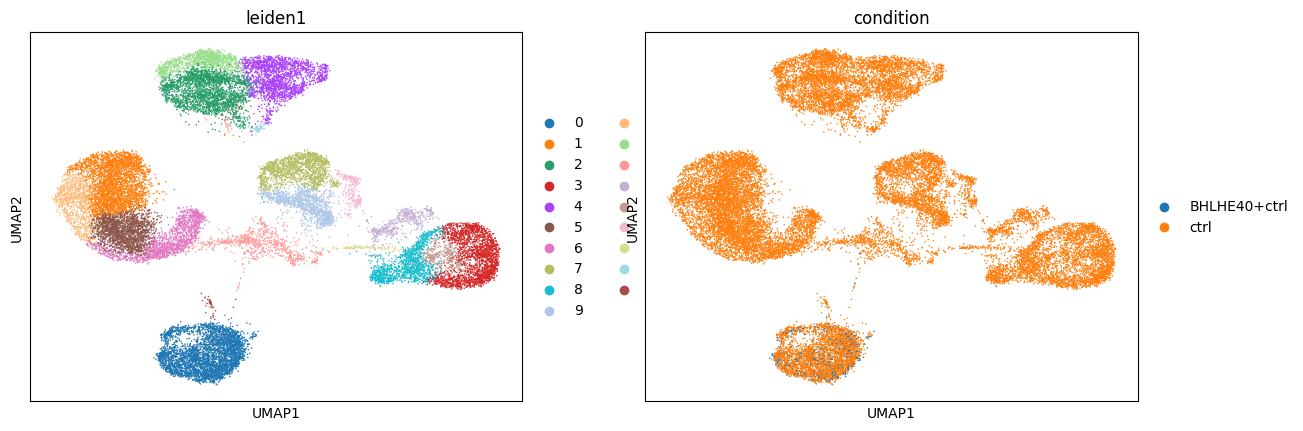

In [13]:
sc.pl.umap(subadata, color=["leiden1","condition"])

In [23]:
sc.tl.rank_genes_groups(
    subadata, groupby="condition", groups=["BHLHE40+ctrl"], reference="ctrl"
)

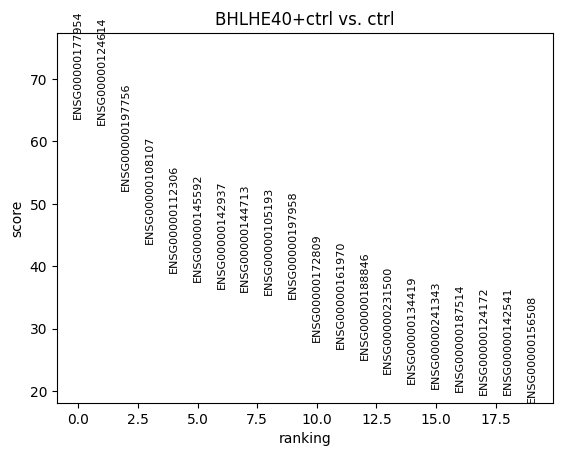

In [24]:
sc.pl.rank_genes_groups(subadata)

In [42]:
import numpy as np

In [54]:
res = pd.DataFrame(data={'names': [i[0] for i in subadata.uns['rank_genes_groups']['names']], 'scores': [i[0] for i in subadata.uns['rank_genes_groups']['scores']], 'lfc': [i[0] for i in subadata.uns['rank_genes_groups']['logfoldchanges']]})

In [55]:
res

,names,scores,lfc
0,ENSG00000177954,63.661858,1.053635
1,ENSG00000124614,62.568336,1.029152
2,ENSG00000197756,52.073315,0.790672
3,ENSG00000108107,43.625656,0.591581
4,ENSG00000112306,38.956951,0.446207
...,...,...,...
5055,ENSG00000167996,-44.398766,-0.628439
5056,ENSG00000168209,-46.007294,-3.948523
5057,ENSG00000134107,-49.063717,-3.956025
5058,ENSG00000002586,-112.591507,-5.760768


In [ ]:
# strangely the top different genes are ribosomal proteins, the bottom DE are random genes

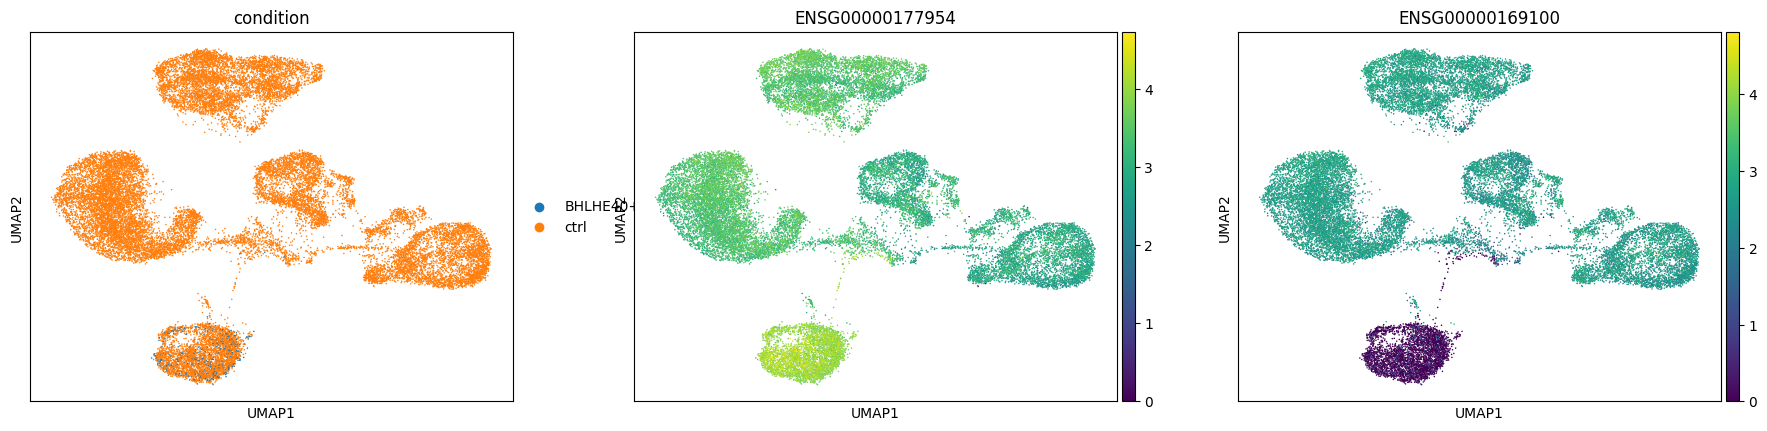

In [31]:
sc.pl.umap(subadata, color=["condition","ENSG00000177954", "ENSG00000169100"])

In [77]:
df[df['BHLHE40|Average']>550].shape # top600

(602, 27)

In [65]:
len(set(subadata.var['gene_name']) - set(df.index)), len(set(df.index) - set(subadata.var['gene_name']))

(5060, 15805)

In [72]:
mostdiff = subadata.var.loc[res['names'].iloc[:10].tolist()+res['names'].iloc[-40:].tolist(), 'gene_name'].tolist()

## main result

we only have an overlap of 2 over the 600 top GTs

In [76]:
len(df[(df['BHLHE40|Average']>550) & (df['Target_genes'].isin(mostdiff))])

2

In [ ]:
# this dataset is bullshit and the way they use it is nonsense